In [1]:
import warnings; warnings.filterwarnings('ignore')
import matplotlib, tarfile, shutil, os, glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
%matplotlib inline

In [192]:
font = {'size'   : 15}
matplotlib.rc('font', **font)

In [21]:
def untar(fname):
    try: shutil.rmtree("tmp")
    except: pass
    os.mkdir("tmp")
    tar = tarfile.open(fname)
    tar.extractall()
    tar.close()
def get_max_op(op, results, rank="4"):
    fname = ""
    untar(results + "/out/perf.tar.gz")
    shutil.move("perf/perf." + rank, "tmp/perf." + rank)
    fname = "tmp/perf." + rank
    df = pd.read_csv(fname, names=['ts', 'op', 'count'])
    df = df[df['op'] == op]

    shift = np.min(df['ts']) * np.ones(len(df['ts']))
    df['shift'] = df['ts'] - shift
    return df.head(int(len(df)*0.6)).tail(1)
def get_max_traj(results):
    if os.path.exists(results + "/times.out"):
        df = pd.read_csv(results + "/times.out", delimiter=" ", index_col=False, names=["wc", "traj"])
    else:
        untar(results + "/times.tar.gz")
        shutil.move("times.out", "tmp/times.out")                
        df = pd.read_csv("tmp/times.out", delimiter=" ", index_col=False, names=["wc", "traj"])
    print df.tail(1)
    return df.head(int(len(df)*0.6)).tail(1)

trajs = []; terror = []; label = []; memory = []; merror = []
for runs in [("../scale-workers-8-d100K-164563",
              "../scale-workers-8-d100K-164563",
              "../scale-workers-8-d100K-164568",
              "../scale-workers-8-d100K-164569",
              "../scale-workers-8-d100K-164576",
              "../scale-workers-8-d100K-164577",
              "../scale-workers-8-d100K-164584",
              "../scale-workers-8-d100K-164849",
              "../scale-workers-8-d100K-164857",
              "../scale-workers-8-d100K-164865"
              )]:
    t = []; m = []
    for run in runs:
        t.append(float(get_max_traj(run)['traj']))
        m.append(float(get_max_op("DBMemorySize", run)['count']))
    label.append(os.path.basename(run).split('-')[3] + str(l) + "\nKeys")
    trajs.append(float(np.mean(t)))
    terror.append(float(np.std(t)))
    memory.append(float(np.mean(m)))
    print m
    print t
    merror.append(float(np.std(m)))

        wc     traj
149  15000  6189368
        wc     traj
149  15000  6189368
        wc     traj
149  15000  6020194
        wc     traj
121  12200  5800131
        wc     traj
149  15000  6016622
        wc     traj
121  12200  5735075
        wc     traj
120  12100  5804659
        wc     traj
149  15000  6154517
        wc     traj
149  15000  6116539
        wc     traj
149  15000  6140329
[131913008.0, 131913008.0, 189676544.0, 389538352.0, 133700632.0, 397928088.0, 391795184.0, 161789856.0, 192060440.0, 217924032.0]
[5373812.0, 5373812.0, 5108185.0, 4924676.0, 5140203.0, 4932943.0, 4899084.0, 5131127.0, 5159049.0, 5113355.0]


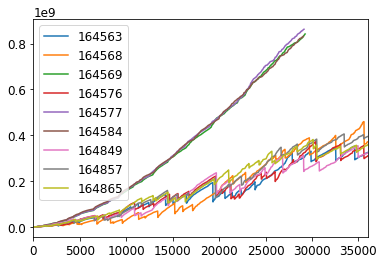

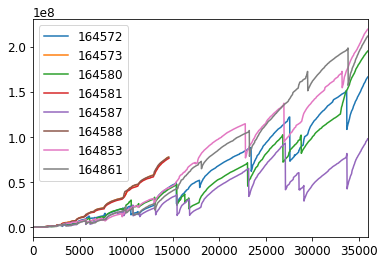

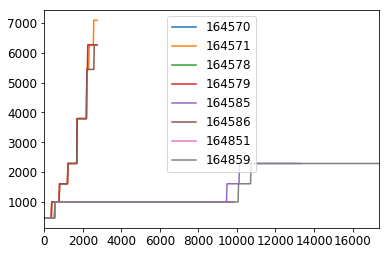

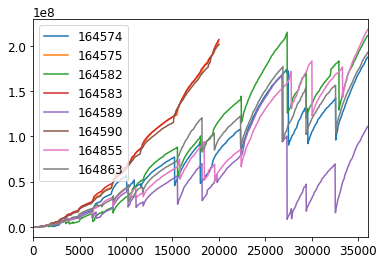

In [52]:
def untar(fname):
    try: shutil.rmtree("tmp")
    except: pass
    os.mkdir("tmp")
    tar = tarfile.open(fname)
    tar.extractall()
    tar.close()
def get_op(op, results, rank="4"):
    fname = ""
    untar(results + "/out/perf.tar.gz")
    shutil.move("perf/perf." + rank, "tmp/perf." + rank)
    fname = "tmp/perf." + rank
    df = pd.read_csv(fname, names=['ts', 'op', 'count'])
    df = df[df['op'] == op]

    shift = np.min(df['ts']) * np.ones(len(df['ts']))
    df['shift'] = df['ts'] - shift
    df['count'] = df['count'].astype(float)
    return df
def get_max_traj(results):
    if os.path.exists(results + "/times.out"):
        df = pd.read_csv(results + "/times.out", delimiter=" ", index_col=False, names=["wc", "traj"])
    else:
        untar(results + "/times.tar.gz")
        shutil.move("times.out", "tmp/times.out")                
        df = pd.read_csv("tmp/times.out", delimiter=" ", index_col=False, names=["wc", "traj"])
    return df.tail(1)

fig, ax = plt.subplots(1, 1)
for runs in [("../scale-workers-8-d100K-164563",
              "../scale-workers-8-d100K-164568",
              "../scale-workers-8-d100K-164569",
              "../scale-workers-8-d100K-164576",
              "../scale-workers-8-d100K-164577",
              "../scale-workers-8-d100K-164584",
              "../scale-workers-8-d100K-164849",
              "../scale-workers-8-d100K-164857",
              "../scale-workers-8-d100K-164865"
              )]:
    for run in runs:
        df = get_op("DBMemorySize", run)
        df.plot(y='count', ax=ax, label=run.split('-')[4])

fig, ax = plt.subplots(1, 1)
for runs in [("../scale-workers-8-d1M-164572",
              "../scale-workers-8-d1M-164573",
              "../scale-workers-8-d1M-164580",
              "../scale-workers-8-d1M-164581",
              "../scale-workers-8-d1M-164587",
              "../scale-workers-8-d1M-164588",
              "../scale-workers-8-d1M-164853",
              "../scale-workers-8-d1M-164861"
              )]:
    for run in runs:
        df = get_op("DBMemorySize", run)
        df.plot(y='count', ax=ax, label=run.split('-')[4])

fig, ax = plt.subplots(1, 1)
for runs in [("../scale-workers-8-d10M-164570",
              "../scale-workers-8-d10M-164571",
              "../scale-workers-8-d10M-164578",
              "../scale-workers-8-d10M-164579",
              "../scale-workers-8-d10M-164585",
              "../scale-workers-8-d10M-164586",
              "../scale-workers-8-d10M-164851",
              "../scale-workers-8-d10M-164859"
              )]:
    for run in runs:
        df = get_op("DBMemorySize", run)
        df.plot(y='count', ax=ax, label=run.split('-')[4])

fig, ax = plt.subplots(1, 1)
for runs in [("../scale-workers-8-d500K-164574",
              "../scale-workers-8-d500K-164575",
              "../scale-workers-8-d500K-164582",
              "../scale-workers-8-d500K-164583",
              "../scale-workers-8-d500K-164589",
              "../scale-workers-8-d500K-164590",
              "../scale-workers-8-d500K-164855",
              "../scale-workers-8-d500K-164863"
              )]:
    for run in runs:
        df = get_op("DBMemorySize", run)
        df.plot(y='count', ax=ax, label=run.split('-')[4])


10M does not give give us enough events, so focus on 3 runs that look good from our regime detection.

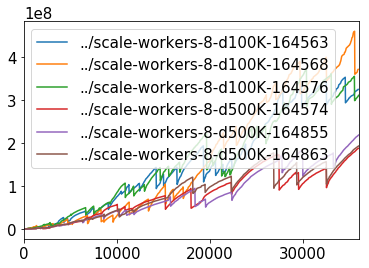

In [199]:
def plot_memory(ax, runs, rank="4"):
    for run in runs:
        df = get_op("DBMemorySize", run, rank=rank)
        df.plot(y='count', ax=ax, label=run)
fig, ax = plt.subplots(1, 1)
plot_memory(ax, ["../scale-workers-8-d100K-164563", "../scale-workers-8-d100K-164568", "../scale-workers-8-d100K-164576"])
plot_memory(ax, ["../scale-workers-8-d500K-164574", "../scale-workers-8-d500K-164855", "../scale-workers-8-d500K-164863"])
#plot_memory(ax, ["../baseline/scale-workers-8-d100K-NULL-166544", "../baseline/scale-workers-8-d100K-NULL-166549"], rank="1")

[335319122.6666667, 996220632.0, 199413410.66666666, 490931912.0, 208615466.66666666, 306107920.0]


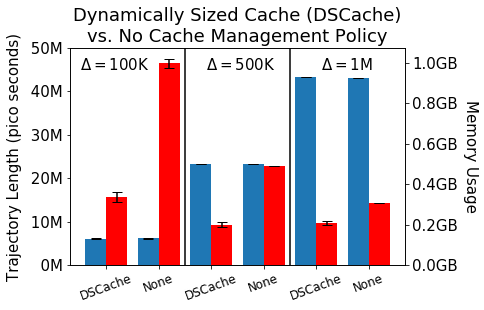

In [237]:
def get_max_op(op, results, rank="4"):
    fname = ""
    untar(results + "/out/perf.tar.gz")
    shutil.move("perf/perf." + rank, "tmp/perf." + rank)
    fname = "tmp/perf." + rank
    df = pd.read_csv(fname, names=['ts', 'op', 'count'])
    df = df[df['op'] == op]

    shift = np.min(df['ts']) * np.ones(len(df['ts']))
    df['shift'] = df['ts'] - shift
    #return df.head(int(len(df)*0.6)).tail(1)
    return df.tail(1)

def plot_traj_vs_mem(run_list, ax):
    trajs = []; terror = []; memory = []; merror = []; label=[]
    for runs in run_list:
        t = []; m = []
        for run in runs:
            t.append(float(get_max_traj(run)['traj']))
            try:
                mem = get_max_op("DBMemorySize", run)['count']
                m.append(float(mem))
            except:
                mem = get_max_op("DBMemorySize", run, rank="1")['count']
                m.append(float(mem))
        #l = os.path.basename(run).split('-')[3].split('d')[1]
        if "NULL" in runs[0]:
            label.append("None")
        else:
            label.append("DSCache")
        trajs.append(float(np.mean(t))); terror.append(float(np.std(t)))
        memory.append(float(np.mean(m))); merror.append(float(np.std(m)))
    print memory
    ax.bar(np.arange(len(trajs)) - 0.2, trajs, yerr=terror, capsize=5, width=0.4, label="Performance (y1 axis)")
    ax.set_xticks(range(0, len(trajs))); ax.set_xticklabels(label, fontsize=12, rotation=20)
    ax.set_ylim(0, 50*1000*1000); ax.set_yticklabels("")
    ax.set_ylabel("Trajectory Length (pico seconds)")
    #ax.set_ylim(0, 6.2*1000*1000)
    ax.set_yticklabels(['{:3.0f}M'.format(yval/(1000*1000)) for yval in ax.get_yticks()])
    ax.set_title("Dynamically Sized Cache (DSCache)\nvs. No Cache Management Policy")
    ax2 = ax.twinx()
    ax2.bar(np.arange(len(memory)) + 0.2, memory, yerr=merror, capsize=5, width=0.4, color='r', label="Memory (y2 axis)")
    ax2.set_xticks(range(0, len(memory)))
    ax2.set_ylabel("Memory Usage", rotation=270, labelpad=20); ax2.set_ylim(0, 1*1024*1024*1024); ax2.set_yticklabels(['{:3.1f}GB'.format(yval/(1000*1000*1000)) for yval in ax2.get_yticks()])
    ax.annotate(r'$\Delta=100$K', xytext=(-0.5, 45*1000000), xy=(-0.5, 45*1000000))
    ax.annotate(r'$\Delta=500$K', xytext=(1.9, 45*1000000), xy=(1.9, 45*1000000))
    ax.annotate(r'$\Delta=1$M', xytext=(4.1, 45*1000000), xy=(4.1, 45*1000000))

fig, ax = plt.subplots(1, 1)
plot_traj_vs_mem([("../scale-workers-8-d100K-164563", "../scale-workers-8-d100K-164568","../scale-workers-8-d100K-164576"),
                  ("../baseline/scale-workers-8-d100K-NULL-166668", "../baseline/scale-workers-8-d100K-NULL-166672"),
                  ("../scale-workers-8-d500K-164574", "../scale-workers-8-d500K-164855", "../scale-workers-8-d500K-164863"),
                  ("../baseline/scale-workers-8-d500K-NULL-166671", "../baseline/scale-workers-8-d500K-NULL-166671"),
                  ("../scale-workers-8-d1M-164580", "../scale-workers-8-d1M-164853", "../scale-workers-8-d1M-164861"),
                  ("../baseline/scale-workers-8-d1M-NULL-166670", "../baseline/scale-workers-8-d1M-NULL-166670"),
                 ], ax)

plt.axvline(x=1.5, color='black')
plt.axvline(x=3.5, color='black')
fig.savefig("../../../paper/figures/dscache-vs-none.png", bbox_inches='tight', dpi=400)


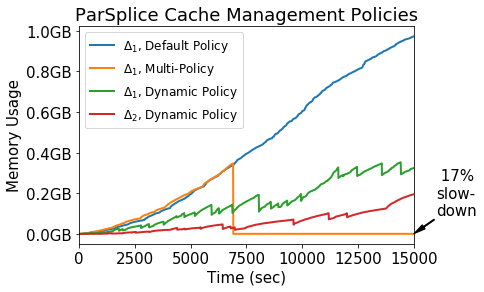

In [234]:
def plot_memory(ax, label, runs, rank="4"):
    for run in runs:
        df = get_op("DBMemorySize", run, rank=rank)
        df.plot(y='count', x='shift', ax=ax, label=label, lw=2)

fig, ax = plt.subplots(1, 1)
plot_memory(ax, r'$\Delta_1$, Default Policy ',["../baseline/scale-workers-8-d100K-NULL-166668"], rank="1")
plot_memory(ax, r'$\Delta_1$, Multi-Policy',   ["../../regime-detection/baseline/scale-cachedecrease-8n-100-72372"], rank="1")
plot_memory(ax, r'$\Delta_1$, Dynamic Policy', ["../scale-workers-8-d100K-164563"])
plot_memory(ax, r'$\Delta_2$, Dynamic Policy', ["../scale-workers-8-d1M-164580"])
ax.set_ylabel("Memory Usage")
ax.set_xlabel("Time (sec)")
ax.set_yticklabels(['{:3.1f}GB'.format(yval/(1000*1000*1000)) for yval in ax.get_yticks()])
ax.legend(fontsize=12)
ax.set_title("ParSplice Cache Management Policies")
ax.annotate(' 17%\nslow-\ndown', xytext=(16000, 0.2*1000*1000*1000), xy=(15000, 0.001*1000*1000*1000), fontsize=15, ha='left', va='center',
           arrowprops=dict(facecolor='black', width=1, headwidth=5))

fig.savefig("../../../paper/figures/memory-vs-time.png", bbox_inches='tight', dpi=400)
